In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pylab as pl
from sklearn import datasets
from sklearn import grid_search
from sklearn.tree import DecisionTreeRegressor

In [3]:
def load_data():
    boston = datasets.load_boston()
    return boston

### explore_city_data

In [20]:
def explore_city_data(city_data):
    """Calculate the Boston housing statistics."""

    # Get the labels and features from the housing data
    housing_prices = city_data.target
    housing_features = city_data.data

    ###################################
    ### Step 1. YOUR CODE GOES HERE ###
    ###################################

    D = {}

    # Please calculate the following values using the Numpy library
    # Size of data (number of houses)?
    D['size_of_data'] = housing_features.shape[0]
    # Number of features?
    D['num_features'] = housing_features.shape[1]
    # Minimum price?
    D['min_price'] = np.min(housing_prices)
    # Maximum price?
    D['max_price'] = np.max(housing_prices)
    # Calculate mean price?
    D['avg_price'] = np.average(housing_prices)
    # Calculate median price?
    D['med_price'] = np.median(housing_prices)
    # Calculate standard deviation?
    D['std_price'] = np.std(housing_prices)
    q1 = np.percentile(housing_prices, 25)
    q3 = np.percentile(housing_prices, 75)
    o = (np.percentile(housing_prices, 75)-np.percentile(housing_prices, 25)) * 1.5
    print q1 - o, q3 + o
    
    print("""
    Size of data (number of houses): {0[size_of_data]}
    Number of features: {0[num_features]}
    Minimum price     : {0[min_price]},
    Maximum price     : {0[max_price]},
    Mean price        : {0[avg_price]},
    Median price      : {0[med_price]},
    Standard deviation: {0[std_price]}
    """.format(D))

In [21]:
city_data = load_data()
explore_city_data(city_data)

5.0625 36.9625

    Size of data (number of houses): 506
    Number of features: 13
    Minimum price     : 5.0,
    Maximum price     : 50.0,
    Mean price        : 22.5328063241,
    Median price      : 21.2,
    Standard deviation: 9.18801154528
    


### split_data

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
def split_data(city_data):
    X, y = city_data.data, city_data.target
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=np.random.randint(1000))
    
    return X_train, y_train, X_test, y_test

In [ ]:
def learning_curve(depth, X_train, y_train, X_test, y_test):
    """Calculate the performance of the model after a set of training data."""

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    print "Decision Tree with Max Depth: "
    print depth

    for i, s in enumerate(sizes):

        # Create and fit the decision tree regressor model
        regressor = DecisionTreeRegressor(max_depth=depth)
        regressor.fit(X_train[:s], y_train[:s])

        # Find the performance on the training and testing set
        train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot learning curve graph
    learning_curve_graph(sizes, train_err, test_err)

In [ ]:
def learning_curve_graph(sizes, train_err, test_err):
    """Plot training and test error as a function of the training size."""

    pl.figure()
    pl.title('Decision Trees: Performance vs Training Size')
    pl.plot(sizes, test_err, lw=2, label = 'test error')
    pl.plot(sizes, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.grid()
    pl.xlabel('Training Size')
    pl.ylabel('Error')
    pl.show()

### performance_metric

In [ ]:
from sklearn import metrics
def performance_metric(label, prediction):
    """Calculate and return the appropriate error performance metric."""

    ###################################
    ### Step 3. YOUR CODE GOES HERE ###
    ###################################

    # The following page has a table of scoring functions in sklearn:
    # http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metri$

    # r = metrics.explained_variance_score(label, prediction)
    # r = metrics.mean_absolute_error(label, prediction)
    r = metrics.mean_squared_error(label, prediction)
    # r = metrics.median_absolute_error(label, prediction)
    # r = metrics.r2_score(label, prediction)

    return r

### model_complexity

In [ ]:
def model_complexity(X_train, y_train, X_test, y_test):
    """Calculate the performance of the model as model complexity increases."""

    print "Model Complexity: "

    # We will vary the depth of decision trees from 2 to 25
    max_depth = np.arange(1, 25)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth=d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    model_complexity_graph(max_depth, train_err, test_err)

In [ ]:
def model_complexity_graph(max_depth, train_err, test_err):
    """Plot training and test error as a function of the depth of the decision tree learn."""

    pl.figure()
    pl.title('Decision Trees: Performance vs Max Depth')
    pl.plot(max_depth, test_err, lw=2, label = 'test error')
    pl.plot(max_depth, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.grid()
    pl.xlabel('Max Depth')
    pl.ylabel('Error')
    pl.show()

### fit_predict_model

In [ ]:
def fit_predict_model(city_data):
    """Find and tune the optimal model. Make a prediction on housing data."""

    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target

    # Setup a Decision Tree Regressor
    regressor = DecisionTreeRegressor()

    ###################################
    ### Step 4. YOUR CODE GOES HERE ###
    ###################################

    # 1. Find an appropriate performance metric. This should be the same as the
    # one used in your performance_metric procedure above:
    # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
    score = 'mean_squared_error'
    
    # 2. We will use grid search to fine tune the Decision Tree Regressor and
    # obtain the parameters that generate the best training performance. Set up
    # the grid search object here.
    # http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}
    reg = grid_search.GridSearchCV(estimator=regressor, param_grid=parameters, scoring=score, cv=3)

    # Fit the learner to the training data to obtain the best parameter set
    print "Final Model: "
    print reg.fit(X, y)
    print reg.best_estimator_

    # Use the model to predict the output of a particular sample
    x = [11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]
    y = reg.predict([x])
    print "House: " + str(x)
    print "Prediction: " + str(y)
    
    return y

In [ ]:
x = np.asarray([11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13])
for e in city_data.data == x:
    if np.sum(e) == 13:
        print e

### Main


    Size of data (number of houses): 506
    Number of features: 13
    Minimum price     : 5.0,
    Maximum price     : 50.0,
    Mean price        : 22.5328063241,
    Median price      : 21.2,
    Standard deviation: 9.18801154528
    
Decision Tree with Max Depth: 
1


/Users/youki/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/youki/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


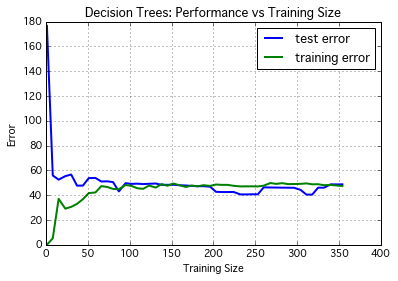

Decision Tree with Max Depth: 
2


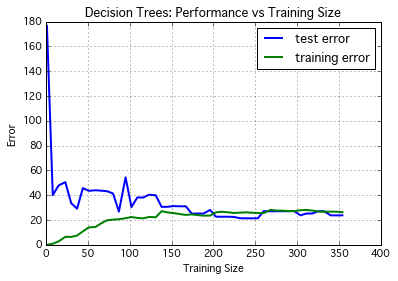

Decision Tree with Max Depth: 
3


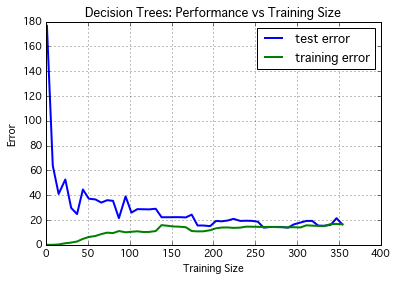

Decision Tree with Max Depth: 
4


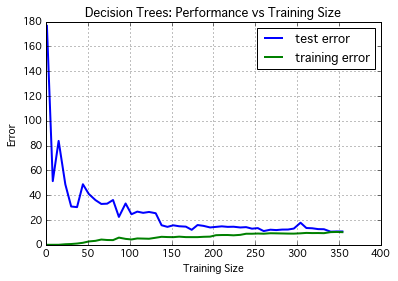

Decision Tree with Max Depth: 
5


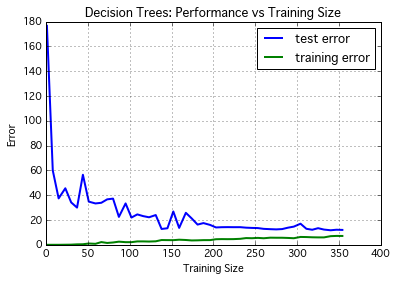

Decision Tree with Max Depth: 
6


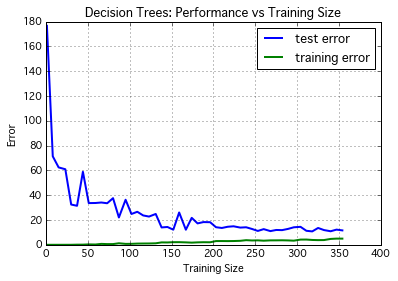

Decision Tree with Max Depth: 
7


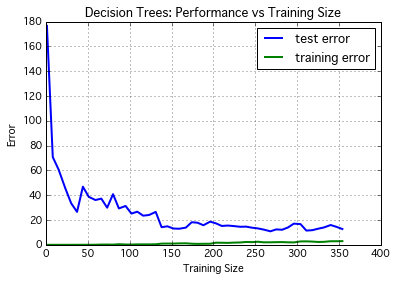

Decision Tree with Max Depth: 
8


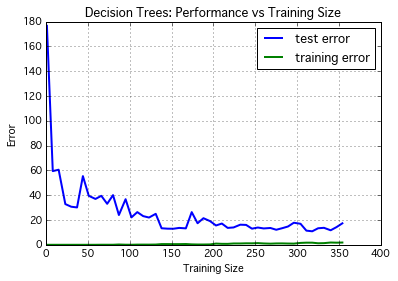

Decision Tree with Max Depth: 
9


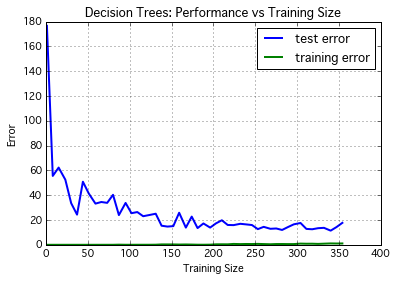

Decision Tree with Max Depth: 
10


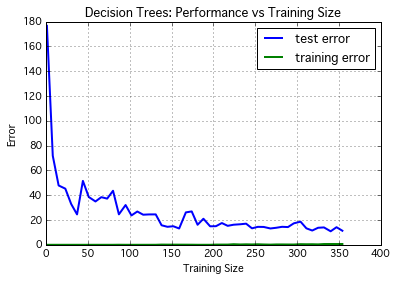

Model Complexity: 


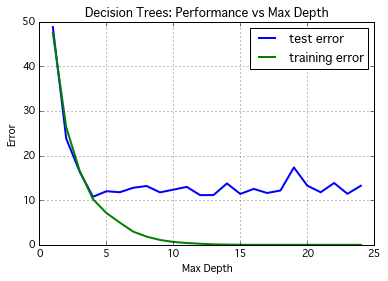

Final Model: 
GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)
DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
House: [11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]
Prediction: [ 21.62974359]


array([ 21.62974359])

In [268]:
city_data = load_data()
explore_city_data(city_data)

# Learning Curve Graphs
X_train, y_train, X_test, y_test = split_data(city_data)

max_depths = [1,2,3,4,5,6,7,8,9,10]
for max_depth in max_depths:
    learning_curve(max_depth, X_train, y_train, X_test, y_test)
    
model_complexity(X_train, y_train, X_test, y_test)

fit_predict_model(city_data)

### To decide appropriate parameter with complexity graph

In [228]:
def myfunc(X_train, y_train, X_test, y_test):
    """Calculate the performance of the model as model complexity increases."""

    # We will vary the depth of decision trees from 2 to 25
    max_depth = np.arange(1, 25)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth=d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))
        
    return train_err, test_err, test_err - train_err

In [229]:
L_train = []
L_test = []
L_diff = []
for i in range(1000):
    X_train, y_train, X_test, y_test = split_data(city_data)
    R = myfunc(X_train, y_train, X_test, y_test)
    L_train.append(R[0])
    L_test.append(R[1])
    L_diff.append(R[2])

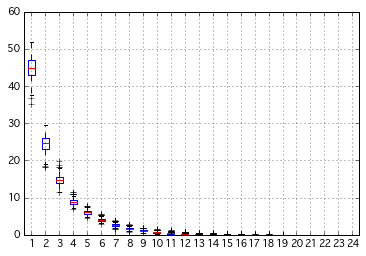

In [230]:
A = np.asarray(L_train)
P = pl.boxplot(A)
grid()

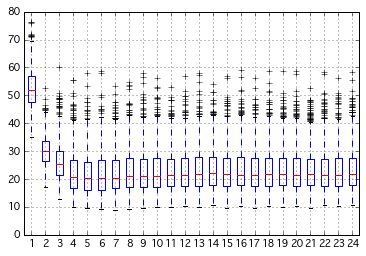

In [231]:
A = np.asarray(L_test)
P = pl.boxplot(A)
grid()

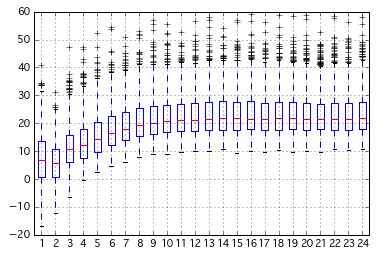

In [232]:
A = np.asarray(L_diff)
P = pl.boxplot(A)
grid()

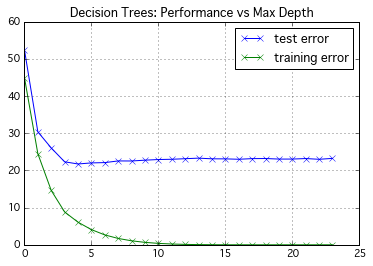

In [233]:
A = np.mean(np.asarray(L_train), axis=0)
B = np.mean(np.asarray(L_test), axis=0)
C = np.mean(np.asarray(L_diff), axis=0)

title("Decision Trees: Performance vs Max Depth")
plot(B, 'b-x', label='test error')
plot(A, 'g-x', label="training error")

#plot(C, 'r--x', label='diff')
grid()
legend()

In [260]:
def myfunc(city_data):
    """Find and tune the optimal model. Make a prediction on housing data."""

    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target

    # Setup a Decision Tree Regressor
    regressor = DecisionTreeRegressor()

    ###################################
    ### Step 4. YOUR CODE GOES HERE ###
    ###################################

    # 1. Find an appropriate performance metric. This should be the same as the
    # one used in your performance_metric procedure above:
    # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
    score = 'mean_squared_error'
    
    # 2. We will use grid search to fine tune the Decision Tree Regressor and
    # obtain the parameters that generate the best training performance. Set up
    # the grid search object here.
    # http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}
    reg = grid_search.GridSearchCV(estimator=regressor,
                                   param_grid=parameters,
                                   scoring=score,
                                   cv=3)

    # Fit the learner to the training data to obtain the best parameter set
    reg.fit(X, y)

    # Use the model to predict the output of a particular sample
    x = [11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]
    y = reg.predict([x])
    
    return (reg.best_params_['max_depth'], y[0])

In [261]:
L = []

for i in range(1000):
    L.append(myfunc(city_data))

In [262]:
LT = np.asarray(L)
A = np.asarray(LT.T[0], dtype=int)
B = np.asarray(LT.T[1], dtype=float)

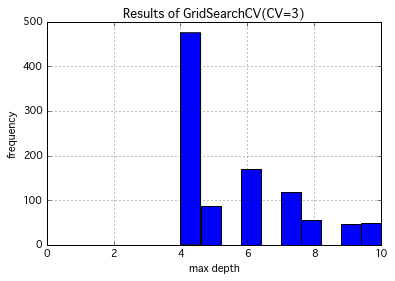

In [266]:
hist(A)
xlim(0,10)
ylabel("frequency")
xlabel("max depth")
title("Results of GridSearchCV(CV=3)")
grid()

20.9239039547
0.84428855523


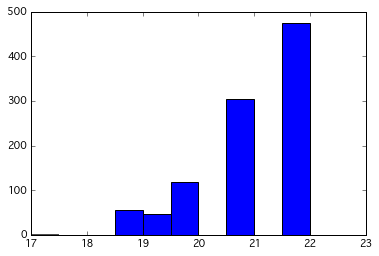

In [264]:
hist(B, bins=np.arange(17.,23.,0.5))
xlim(17., 23.0)
ylim(0, 500)

print np.mean(B)
print np.std(B)

21.6297435897
5.20866317786e-15


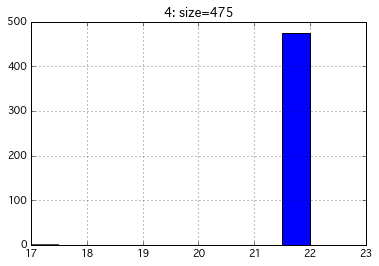

20.9677631579
3.85009698283e-15


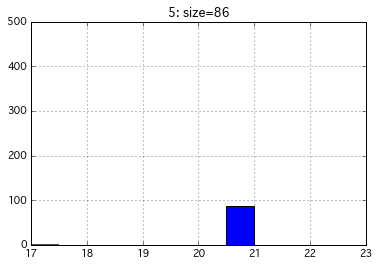

20.7659863946
3.26802127051e-15


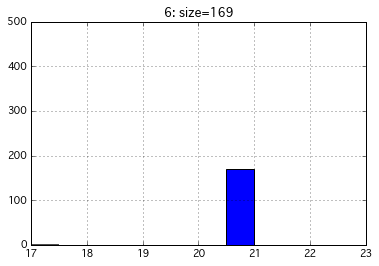

19.9974683544
1.31636616742e-14


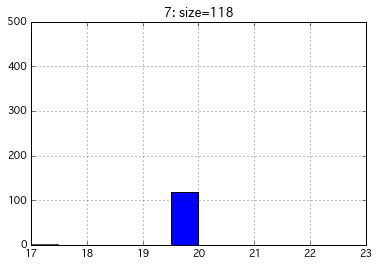

18.8166666667
3.14914409368e-15


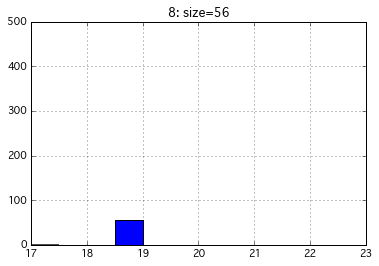

19.3272727273
6.47252264188e-15


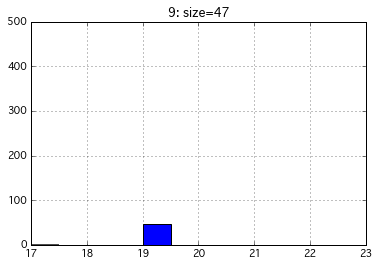

20.72
3.40461826731e-15


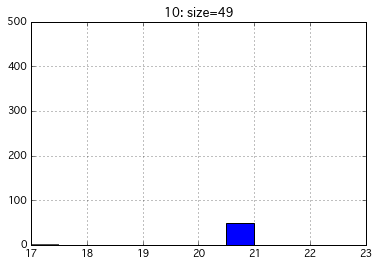

In [265]:
for n in set(A):
    mask = (A == n)
    hist(B[mask], bins=np.arange(17.,23.,0.5))
    title("{0}: size={1}".format(n, np.sum(mask)))
    xlim(17., 23.0)
    ylim(0, 500)
    grid()
    print np.mean(B[mask])
    print np.std(B[mask])
    pl.show()

(0, 10)

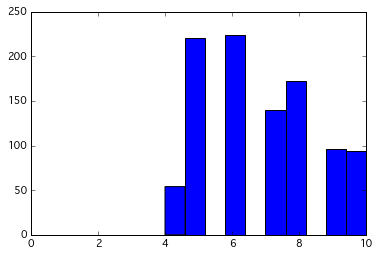

In [250]:
hist(A)
xlim(0,10)

20.2717054191
0.860291199223


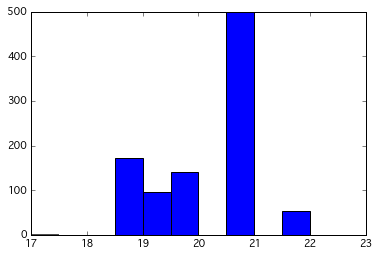

In [251]:
hist(B, bins=np.arange(17.,23.,0.5))
xlim(17., 23.0)
ylim(0, 500)
5
print np.mean(B)
print np.std(B)

21.6297435897
6.3405590523e-15


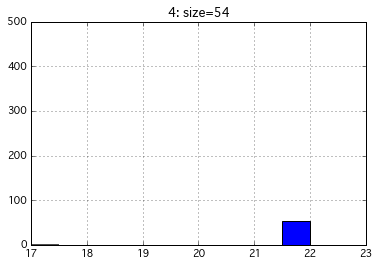

20.9677631579
5.14837123908e-15


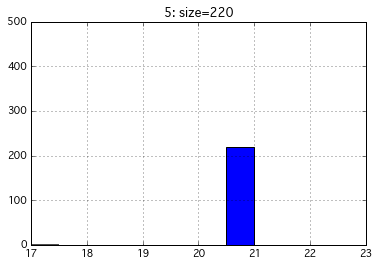

20.7659863946
4.65764692668e-15


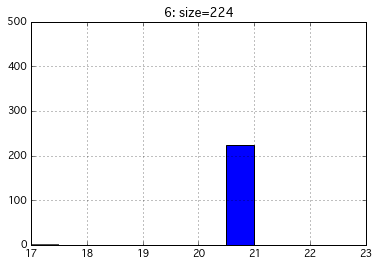

19.9974683544
4.40266276081e-15


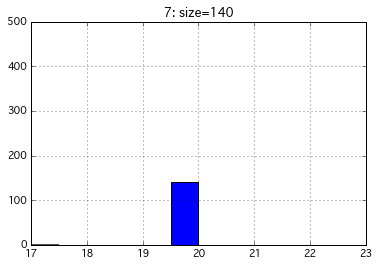

18.8166666667
3.38343847689e-15


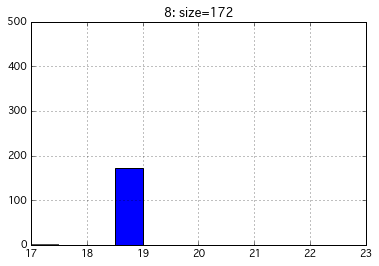

19.3272727273
2.37770964461e-15


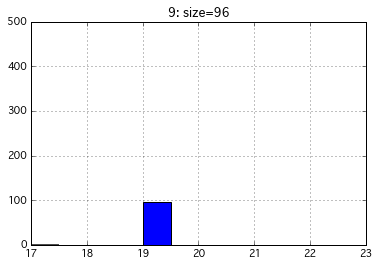

20.72
2.45811693141e-15


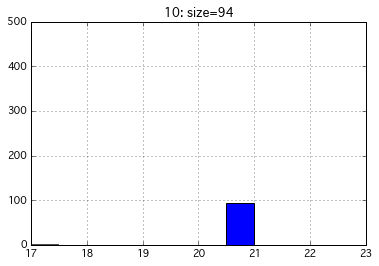

In [252]:
for n in set(A):
    mask = (A == n)
    hist(B[mask], bins=np.arange(17.,23.,0.5))
    title("{0}: size={1}".format(n, np.sum(mask)))
    xlim(17., 23.0)
    ylim(0, 500)
    grid()
    print np.mean(B[mask])
    print np.std(B[mask])
    pl.show()

(array([  21.,   55.,   82.,  154.,   84.,   41.,   30.,    8.,   10.,   21.]),
 array([  5. ,   9.5,  14. ,  18.5,  23. ,  27.5,  32. ,  36.5,  41. ,
         45.5,  50. ]),
 <a list of 10 Patch objects>)

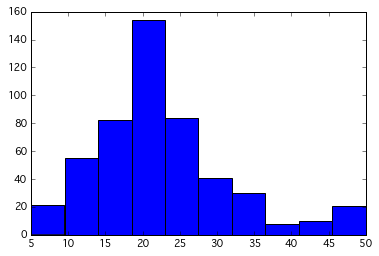

In [277]:
hist(city_data.target)

In [278]:
22.53 + 9.19

31.72

In [279]:
22.53 - 9.19

13.340000000000002

In [241]:
from sklearn import tree
regressor = tree.DecisionTreeRegressor(max_depth=6)
regressor.fit(X_train, y_train)
tree.export_graphviz(regressor, out_file='tree.dot')

#plot(X_train, y_train, 'r.')
#plot(X_train, y_predict, 'g.-')


In [280]:
from sklearn.decomposition import PCA

In [281]:
X = city_data.data

In [304]:
pca = PCA(n_components=2)

In [305]:
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

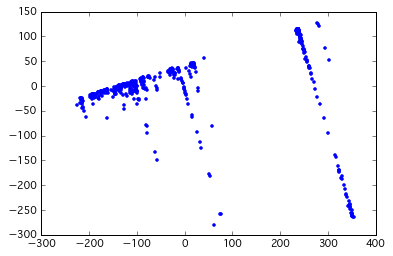

In [306]:
x, y = pca.transform(X).T
plot(x, y, '.')

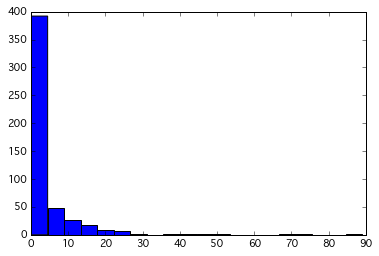

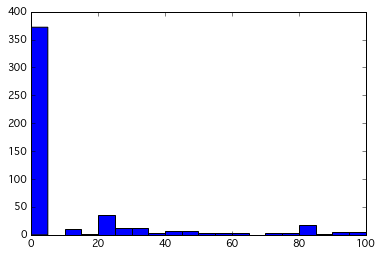

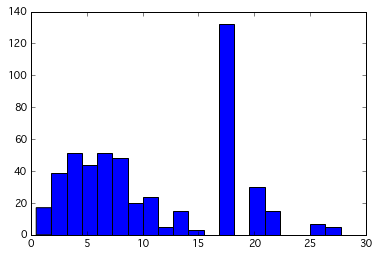

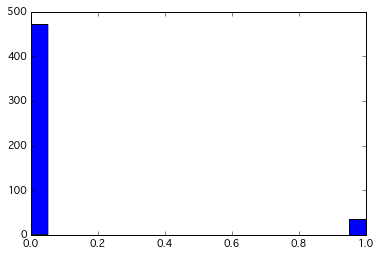

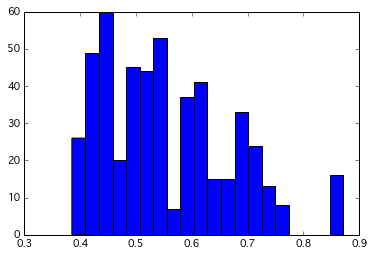

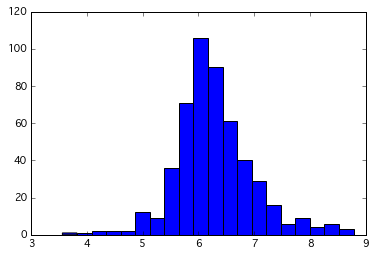

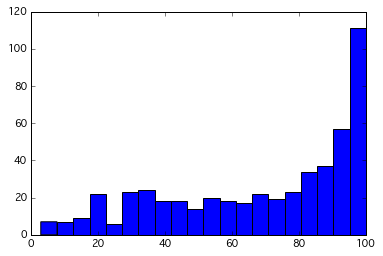

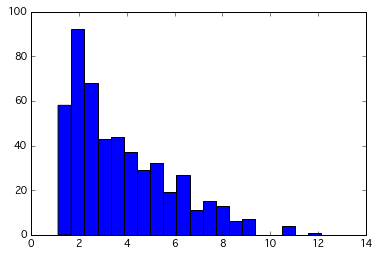

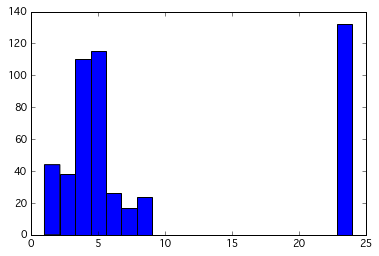

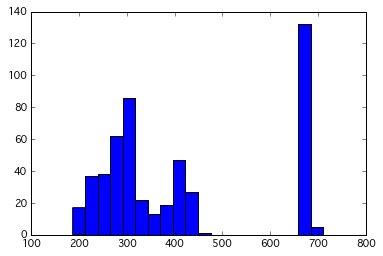

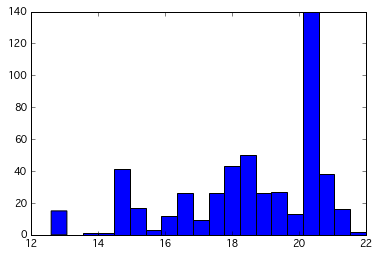

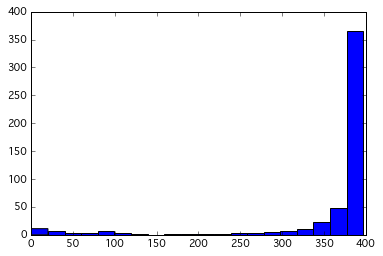

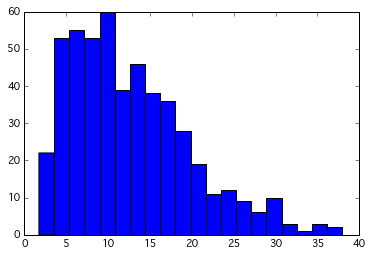

In [313]:
d = city_data.data
k = city_data.keys()
for i in range(13):
    hist(d.T[i], bins=20)
    pl.show()